In [1]:
import os, shutil
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models, optimizers
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import imageio

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
original_dataset_dir = "/content/drive/MyDrive/Colab Notebooks/project2"
base_dir = '/content/drive/My Drive/Colab Notebooks/project2/work'
#os.mkdir(base_dir)

In [4]:
total_hugh_dir = '/content/drive/My Drive/Colab Notebooks/project2/work/total_hugh'
total_ryan_dir = '/content/drive/My Drive/Colab Notebooks/project2/work/total_ryan'
train_Hugh_dir = '/content/drive/My Drive/Colab Notebooks/project2/work/train_Hugh'
train_Ryan_dir = '/content/drive/My Drive/Colab Notebooks/project2/work/train_Ryan'
#os.mkdir(total_hugh_dir)
#os.mkdir(total_ryan_dir)
#os.mkdir(train_Hugh_dir)
#os.mkdir(train_Ryan_dir)

In [5]:
# Base directories
train_dir = os.path.join(base_dir, 'train')
#os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
#os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
#os.mkdir(test_dir)

# Subdirectories within train, validation, and test directories
train_hugh_dir = os.path.join(train_dir, 'hugh')
#os.mkdir(train_hugh_dir)

train_ryan_dir = os.path.join(train_dir, 'ryan')
#os.mkdir(train_ryan_dir)

validation_hugh_dir = os.path.join(validation_dir, 'hugh')
#os.mkdir(validation_hugh_dir)

validation_ryan_dir = os.path.join(validation_dir, 'ryan')
#os.mkdir(validation_ryan_dir)

test_hugh_dir = os.path.join(test_dir, 'hugh')
#os.mkdir(test_hugh_dir)

test_ryan_dir = os.path.join(test_dir, 'ryan')
#os.mkdir(test_ryan_dir)


In [6]:
print('total training Hugh images:', len(os.listdir(train_hugh_dir)))
print('total training Ryan images:', len(os.listdir(train_ryan_dir)))
print('total validation Hugh images:', len(os.listdir(validation_hugh_dir)))
print('total validation Ryan images:', len(os.listdir(validation_ryan_dir)))
print('total testing Hugh images:', len(os.listdir(test_hugh_dir)))
print('total testing Ryan images:', len(os.listdir(test_ryan_dir)))


total training Hugh images: 136
total training Ryan images: 136
total validation Hugh images: 34
total validation Ryan images: 34
total testing Hugh images: 18
total testing Ryan images: 18


/content/drive/My Drive/Colab Notebooks/project2/work/total_hugh/Hugh-10.jpg


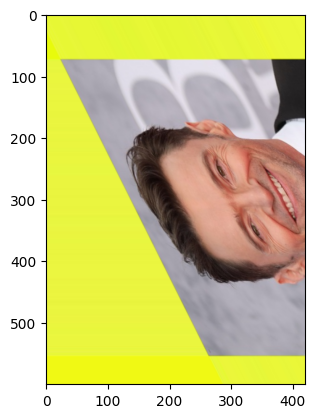

In [ ]:
file_sample = os.path.join(total_hugh_dir, os.listdir(total_hugh_dir)[9])
print(file_sample)
img = plt.imread(file_sample)
data_generator = ImageDataGenerator()
tr_img = data_generator.apply_transform(img, {'theta': 90., 'shear': 30})
plt.imshow(tr_img);

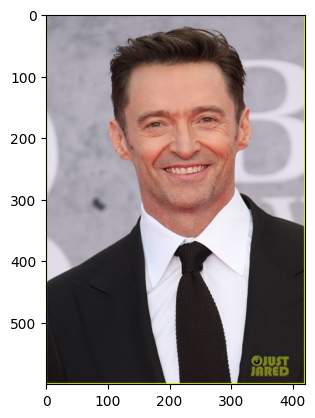

In [ ]:
plt.imshow(img);

In [ ]:
hugh_files = ['Hugh-{}.jpg'.format(i) for i in range(1, 10)]
data_generator = ImageDataGenerator()
for file in hugh_files:
    src_file_path = os.path.join(total_hugh_dir, file)
    img = plt.imread(src_file_path)

    flipped_hor_img = data_generator.apply_transform(img, {'flip_horizontal': True})
    file_dst = file.replace("Hugh-", "Hugh-flipped_horizontal_image-")
    dst_file_path = os.path.join(total_hugh_dir, file_dst)
    imageio.imwrite(dst_file_path, flipped_hor_img)

    flipped_ver_img = data_generator.apply_transform(img, {'flip_vertical': True})
    file_dst = file.replace("Hugh-", "Hugh-flipped_vertical_image-")
    dst_file_path = os.path.join(total_hugh_dir, file_dst)
    imageio.imwrite(dst_file_path, flipped_ver_img)

    flipped_hor_ver_img = data_generator.apply_transform(img, {'flip_vertical': True, 'flip_horizontal': True})
    file_dst = file.replace("Hugh-", "Hugh-flipped_horizontal_vertical_image-")
    dst_file_path = os.path.join(total_hugh_dir, file_dst)
    imageio.imwrite(dst_file_path, flipped_hor_ver_img)

    sheared_img = data_generator.apply_transform(img, {'shear': 30})
    file_dst = file.replace("Hugh-", "Hugh-sheared_image-")
    dst_file_path = os.path.join(total_hugh_dir, file_dst)
    imageio.imwrite(dst_file_path, sheared_img)

    for angle in range(0, 360, 30):
        rotated_img = data_generator.apply_transform(img, {'theta': angle})
        file_dst = file.replace("Hugh-", f"Hugh-{angle}-")
        dst_file_path = os.path.join(total_hugh_dir, file_dst)
        imageio.imwrite(dst_file_path, rotated_img)

In [ ]:
ryan_files = ['Ryan-{}.jpg'.format(i) for i in range(1, 10)]
data_generator = ImageDataGenerator()
for file in ryan_files:
    src_file_path = os.path.join(total_ryan_dir, file)
    img = plt.imread(src_file_path)

    flipped_hor_img = data_generator.apply_transform(img, {'flip_horizontal': True})
    file_dst = file.replace("-", "-flipped_horizontal_image-")
    dst_file_path = os.path.join(total_ryan_dir, file_dst)
    imageio.imwrite(dst_file_path, flipped_hor_img)

    flipped_ver_img = data_generator.apply_transform(img, {'flip_vertical': True})
    file_dst = file.replace("-", "-flipped_vertical_image-")
    dst_file_path = os.path.join(total_ryan_dir, file_dst)
    imageio.imwrite(dst_file_path, flipped_ver_img)

    flipped_hor_ver_img = data_generator.apply_transform(img, {'flip_vertical': True, 'flip_horizontal': True})
    file_dst = file.replace("-", "-flipped_horizontal_vertical_image-")
    dst_file_path = os.path.join(total_ryan_dir, file_dst)
    imageio.imwrite(dst_file_path, flipped_hor_ver_img)

    sheared_img = data_generator.apply_transform(img, {'shear': 30})
    file_dst = file.replace("-", "-sheared_image-")
    dst_file_path = os.path.join(total_ryan_dir, file_dst)
    imageio.imwrite(dst_file_path, sheared_img)

    for angle in range(0, 360, 30):
        rotated_img = data_generator.apply_transform(img, {'theta': angle})
        file_dst = file.replace("-", "-" + str(angle) + "-")
        dst_file_path = os.path.join(total_ryan_dir, file_dst)
        imageio.imwrite(dst_file_path, rotated_img)


In [ ]:
print('total Ryan:', len(os.listdir(total_ryan_dir)))
print('total Hugh:', len(os.listdir(total_hugh_dir)))


total Ryan: 154
total Hugh: 154


In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
all_files = [f for f in os.listdir(total_ryan_dir) if os.path.isfile(os.path.join(total_ryan_dir, f))]
train_files, test_files = train_test_split(all_files, test_size=0.111, random_state=42)

In [ ]:
def copy_files(file_list, src_dir, dst_dir):
    for fname in file_list:
        src_path = os.path.join(src_dir, fname)
        dst_path = os.path.join(dst_dir, fname)
        shutil.copyfile(src_path, dst_path)

In [ ]:
# Copy the files to the respective directories
copy_files(train_files, total_ryan_dir, train_Ryan_dir)
copy_files(test_files, total_ryan_dir, test_ryan_dir)

# Print out the number of files copied
print(f'Total training images: {len(os.listdir(train_Ryan_dir))}')
print(f'Total testing images: {len(os.listdir(test_ryan_dir))}')


Total training images: 136
Total testing images: 18


In [ ]:
all_files = [f for f in os.listdir(total_hugh_dir) if os.path.isfile(os.path.join(total_hugh_dir, f))]
train_files, test_files = train_test_split(all_files, test_size=0.111, random_state=42)


In [ ]:
# Copy the files to the respective directories
copy_files(train_files, total_hugh_dir, train_Hugh_dir)
copy_files(test_files, total_hugh_dir, test_hugh_dir)

# Print out the number of files copied
print(f'Total training images: {len(os.listdir(train_Hugh_dir))}')
print(f'Total testing images: {len(os.listdir(test_hugh_dir))}')


Total training images: 136
Total testing images: 18


In [ ]:
all_files = [f for f in os.listdir(train_Ryan_dir) if os.path.isfile(os.path.join(train_Ryan_dir, f))]
train_files, test_files = train_test_split(all_files, test_size=0.111, random_state=42)


In [ ]:
# Copy the files to the respective directories
copy_files(train_files, train_Ryan_dir, train_ryan_dir)
copy_files(test_files, train_Ryan_dir, validation_ryan_dir)

# Print out the number of files copied
print(f'Total training images: {len(os.listdir(train_ryan_dir))}')
print(f'Total validation images: {len(os.listdir(validation_ryan_dir))}')


Total training images: 136
Total validation images: 34


In [ ]:
all_files = [f for f in os.listdir(train_Hugh_dir) if os.path.isfile(os.path.join(train_Hugh_dir, f))]
train_files, test_files = train_test_split(all_files, test_size=0.111, random_state=42)


In [ ]:
# Copy the files to the respective directories
copy_files(train_files, train_Hugh_dir, train_hugh_dir)
copy_files(test_files, train_Hugh_dir, validation_hugh_dir)

# Print out the number of files copied
print(f'Total training images: {len(os.listdir(train_hugh_dir))}')
print(f'Total validation images: {len(os.listdir(validation_hugh_dir))}')


Total training images: 136
Total validation images: 34


In [ ]:
print('Total training Hugh images:', len(os.listdir(train_hugh_dir)))
print('Total training Ryan images:', len(os.listdir(train_ryan_dir)))
print('Total validation Hugh images:', len(os.listdir(validation_hugh_dir)))
print('Total validation Ryan images:', len(os.listdir(validation_ryan_dir)))
print('Total testing Hugh images:', len(os.listdir(test_hugh_dir)))
print('Total testing Ryan images:', len(os.listdir(test_ryan_dir)))


Total training Hugh images: 136
Total training Ryan images: 136
Total validation Hugh images: 34
Total validation Ryan images: 34
Total testing Hugh images: 18
Total testing Ryan images: 18


 **Model Building**

In [7]:
from tensorflow.keras import layers
from tensorflow.keras import models
model = models.Sequential()

#convolutional base
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

#Flatten
model.add(layers.Flatten())

#Dense classifier
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 15, 15, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       3,211,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

**Optimizer**

In [9]:
from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
#Rescaling

train_generator = train_datagen.flow_from_directory(
                  train_dir,
                  target_size=(150, 150),
                  batch_size=20,
                  class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 272 images belonging to 2 classes.
Found 68 images belonging to 2 classes.


In [11]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [12]:
history = model.fit(
    train_generator,
    steps_per_epoch=50,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=20)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


14/50 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - acc: 0.4497 - loss: 0.6992

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


50/50 ━━━━━━━━━━━━━━━━━━━━ 52s 646ms/step - acc: 0.4621 - loss: 0.6981 - val_acc: 0.5147 - val_loss: 0.6832
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 49s 332ms/step - acc: 0.5234 - loss: 0.6866 - val_acc: 0.6618 - val_loss: 0.6837
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 21s 321ms/step - acc: 0.5799 - loss: 0.6780 - val_acc: 0.5588 - val_loss: 0.6708
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 19s 308ms/step - acc: 0.5906 - loss: 0.6757 - val_acc: 0.5882 - val_loss: 0.6660
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 21s 308ms/step - acc: 0.6308 - loss: 0.6590 - val_acc: 0.5588 - val_loss: 0.6586
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 22s 314ms/step - acc: 0.5996 - loss: 0.6487 - val_acc: 0.6912 - val_loss: 0.6523
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 17s 305ms/step - acc: 0.6879 - loss: 0.6394 - val_acc: 0.7500 - val_loss: 0.6261
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 17s 310ms/step - acc: 0.7091 - loss: 0.6176 - val_acc: 0.6765 - val_loss: 0.6176
Epoch 9/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 20s 304ms/step - acc:

In [13]:
# model saving
model.save('start.h5')

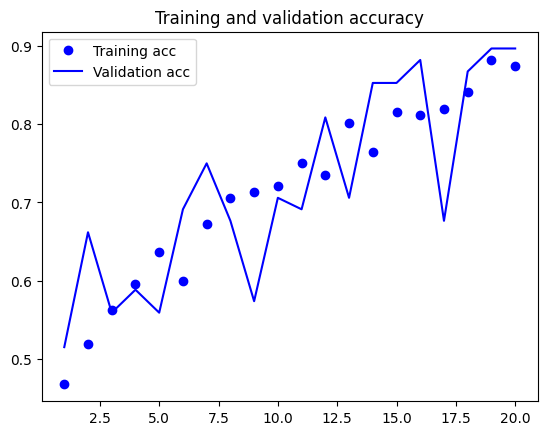

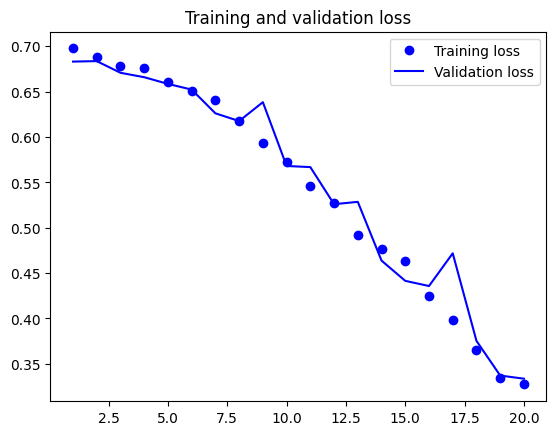

In [14]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [15]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

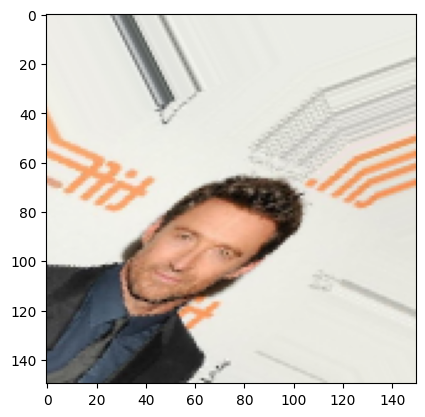

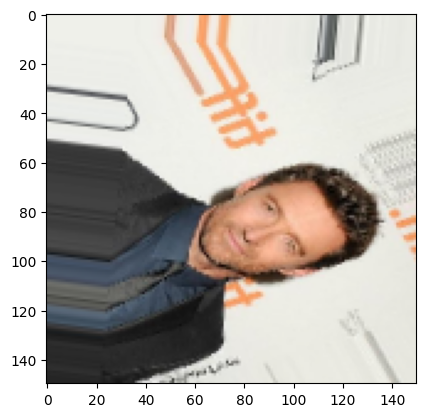

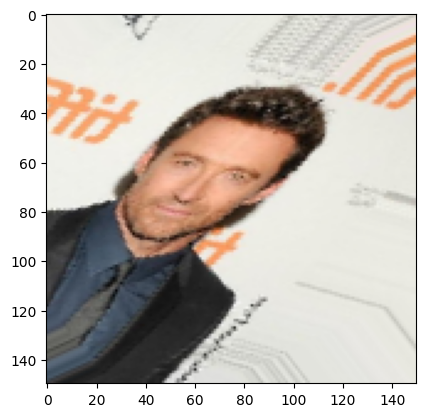

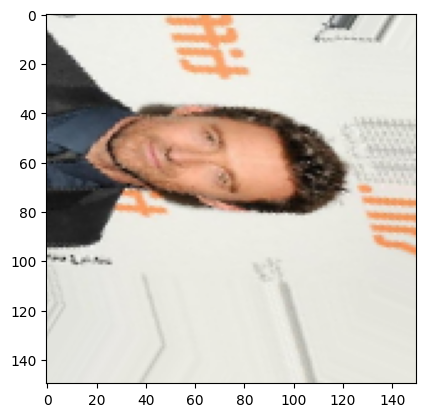

In [16]:
from keras.preprocessing import image

fnames = [os.path.join(train_hugh_dir, fname) for
          fname in os.listdir(train_hugh_dir)]

img_path = fnames[3]
img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i=0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

In [17]:
model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Flatten())
model1.add(layers.Dropout(0.5))
model1.add(layers.Dense(512, activation='relu'))
model1.add(layers.Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 15, 15, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │       3,211,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model1.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [23]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 272 images belonging to 2 classes.
Found 68 images belonging to 2 classes.


In [24]:
history = model1.fit(
    train_generator,
    steps_per_epoch=50,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=20)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


14/50 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - acc: 0.4896 - loss: 0.6927

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


50/50 ━━━━━━━━━━━━━━━━━━━━ 22s 336ms/step - acc: 0.5077 - loss: 0.6931 - val_acc: 0.5000 - val_loss: 0.6858
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 21s 364ms/step - acc: 0.5136 - loss: 0.6895 - val_acc: 0.5294 - val_loss: 0.6835
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 43s 412ms/step - acc: 0.5123 - loss: 0.6899 - val_acc: 0.5000 - val_loss: 0.6812
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 21s 343ms/step - acc: 0.5153 - loss: 0.6913 - val_acc: 0.5000 - val_loss: 0.6787
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 39s 322ms/step - acc: 0.5166 - loss: 0.6824 - val_acc: 0.6029 - val_loss: 0.6750
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 20s 323ms/step - acc: 0.6250 - loss: 0.6762 - val_acc: 0.5000 - val_loss: 0.6773
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 19s 326ms/step - acc: 0.5789 - loss: 0.6820 - val_acc: 0.5882 - val_loss: 0.6645
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 20s 324ms/step - acc: 0.5953 - loss: 0.6661 - val_acc: 0.6765 - val_loss: 0.6503
Epoch 9/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 22s 333ms/step - acc:

In [25]:
model.save('cnn-proj2.h5')

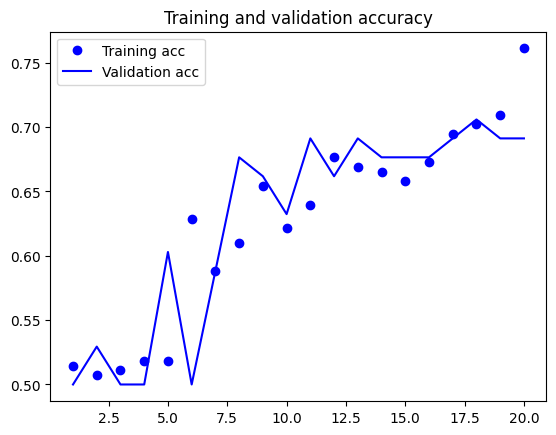

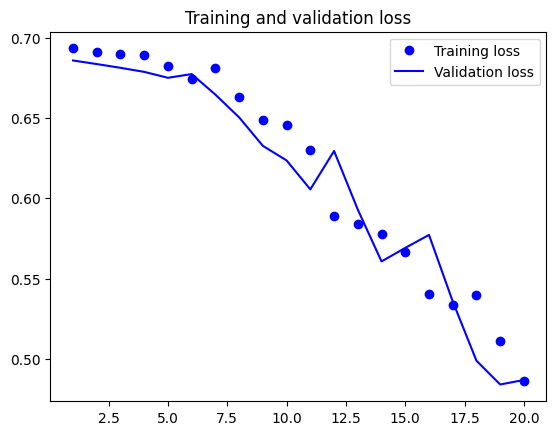

In [26]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [27]:
#fast feature extraction
from keras.applications import VGG16
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [28]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 150, 150, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 150, 150, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 75, 75, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 75, 75, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 37, 37, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 18, 18, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 18, 18, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 9, 9, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [30]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [31]:
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

In [35]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def extract_features(directory, sample_count, batch_size):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    datagen = ImageDataGenerator(rescale=1./255)  # Define the data generator
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        batch_size_actual = features_batch.shape[0]


        end_index = i * batch_size + batch_size_actual

        if end_index > sample_count:
            end_index = sample_count

        features[i * batch_size : end_index] = features_batch[:end_index - i * batch_size]
        labels[i * batch_size : end_index] = labels_batch[:end_index - i * batch_size]

        i += 1

        if end_index >= sample_count:
            break

    return features, labels

train_features, train_labels = extract_features(train_dir, 226, batch_size)
validation_features, validation_labels = extract_features(validation_dir, 30, batch_size)
test_features, test_labels = extract_features(test_dir, 32, batch_size)


Found 272 images belonging to 2 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
Found 68 images belonging to 2 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
Found 36 images belonging to 2 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


In [36]:
from keras import models
from keras import layers
from keras import optimizers

In [46]:
model2 = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(4, 4, 512)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')])

In [47]:
model2.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])


In [48]:
history = model2.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

Epoch 1/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - acc: 0.5780 - loss: 0.6824 - val_acc: 0.7333 - val_loss: 0.6188
Epoch 2/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - acc: 0.7083 - loss: 0.6028 - val_acc: 0.7333 - val_loss: 0.5845
Epoch 3/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - acc: 0.7490 - loss: 0.5929 - val_acc: 0.7333 - val_loss: 0.5609
Epoch 4/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - acc: 0.8097 - loss: 0.5428 - val_acc: 0.8667 - val_loss: 0.5541
Epoch 5/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - acc: 0.8495 - loss: 0.4969 - val_acc: 0.7667 - val_loss: 0.5194
Epoch 6/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - acc: 0.9210 - loss: 0.4539 - val_acc: 0.8000 - val_loss: 0.5012
Epoch 7/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - acc: 0.9182 - loss: 0.4317 - val_acc: 0.8667 - val_loss: 0.4963
Epoch 8/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - acc: 0.9158 - loss: 0.4327 - val_acc: 0.8333 - val_loss: 0.4695
Epoch 9/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - acc: 0.9473

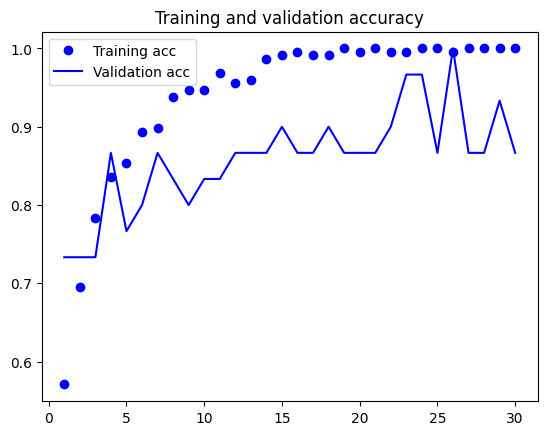

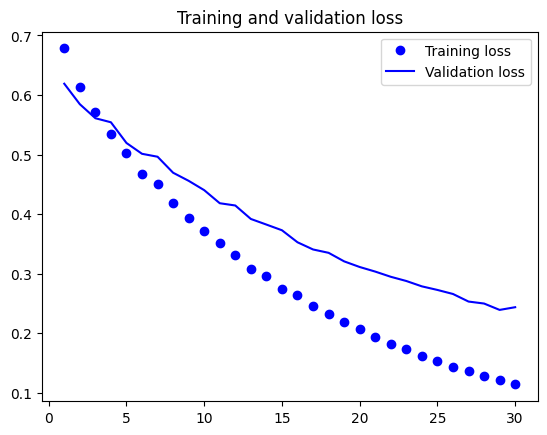

In [49]:
#Plotting the results
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [50]:
from keras import models
from keras import layers

In [60]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models


conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))


for layer in conv_base.layers:
    layer.trainable = False

inputs = layers.Input(shape=(150, 150, 3))
x = conv_base(inputs, training=False)
x = layers.Flatten()(x)  # Flatten the output
x = layers.Dense(256, activation='relu')(x)
outputs = layers.Dense(1, activation='sigmoid')(x)

model3 = models.Model(inputs, outputs)

# Compile the model
model3.compile(optimizer='adam',
               loss='binary_crossentropy',
               metrics=['accuracy'])


In [61]:
model3.summary()

Model: "functional_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_13 (InputLayer)          │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ vgg16 (Functional)                   │ (None, 4, 4, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 256)                 │       2,097,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,812,353 (64.13 MB)

 Trainable params: 2,097,665 (8.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [62]:
print('This is the number of trainable weights '
'before freezing the conv base:', len(model.trainable_weights))

conv_base.trainable = False

print('This is the number of trainable weights '
'after freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 12
This is the number of trainable weights after freezing the conv base: 12


In [63]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 272 images belonging to 2 classes.
Found 68 images belonging to 2 classes.


In [64]:
model3.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=2e-5),
              metrics=['acc'])

In [68]:
history = model3.fit(
    train_generator,
    steps_per_epoch=20,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=10)

Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 96s 5s/step - acc: 0.8014 - loss: 0.5052 - val_acc: 0.8382 - val_loss: 0.4640
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 97s 5s/step - acc: 0.8496 - loss: 0.4680 - val_acc: 0.8088 - val_loss: 0.4461
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 140s 5s/step - acc: 0.8112 - loss: 0.4828 - val_acc: 0.8529 - val_loss: 0.4297
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 95s 5s/step - acc: 0.8136 - loss: 0.4632 - val_acc: 0.8529 - val_loss: 0.4134
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 143s 5s/step - acc: 0.8511 - loss: 0.4208 - val_acc: 0.8676 - val_loss: 0.4064
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 142s 5s/step - acc: 0.7809 - loss: 0.4661 - val_acc: 0.8676 - val_loss: 0.3926
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 143s 5s/step - acc: 0.8727 - loss: 0.4089 - val_acc: 0.8971 - val_loss: 0.3752
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 140s 5s/step - acc: 0.8440 - loss: 0.4357 - val_acc: 0.8529 - val_loss: 0.3704
Epoch 9/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 95s 5s/step - acc: 0.8593 - l

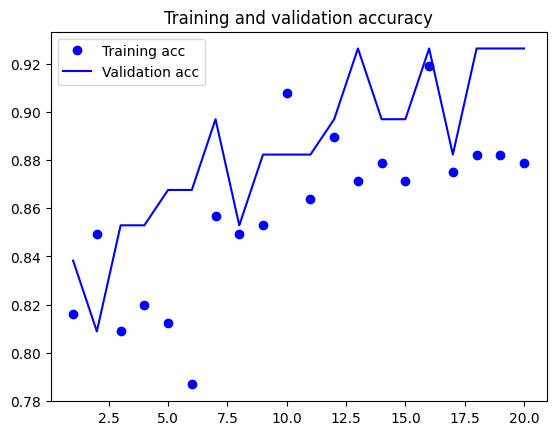

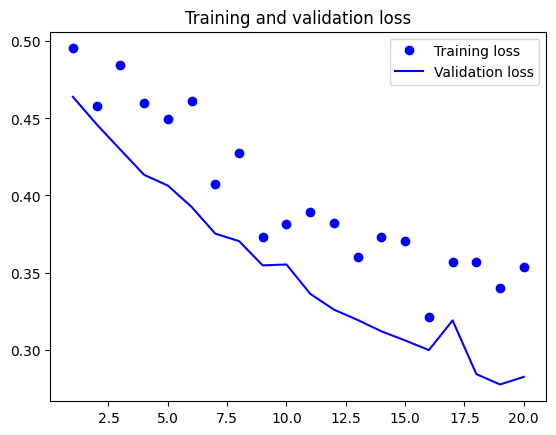

In [69]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [70]:
model = model1
predlist = []

In [71]:
# Directory containing the images
img_directory = '/content/drive/My Drive/Colab Notebooks/project2/work/test/ryan'

# List all files in the directory
all_files = os.listdir(img_directory)

# Filter out only the .jpg files
jpg_files = [f for f in all_files if f.endswith('.jpg')]

# Load each image
for img_file in jpg_files:
    img_path = os.path.join(img_directory, img_file)

    try:
        # Load the image
        img = image.load_img(img_path, target_size=(150, 150))
        img_tensor = image.img_to_array(img)
        img_tensor = np.expand_dims(img_tensor, axis=0)
        img_tensor /=255.
        predlist.append(model.predict(img_tensor))
        print(f"Loaded image: {img_file}")
        plt.imshow(img_tensor[0])
        plt.show()

        # You can now process the img_tensor as needed

    except Exception as e:
        print(f"Failed to load image {img_file}: {e}")



Output hidden; open in https://colab.research.google.com to view.

In [72]:
# Directory containing the images
img_directory = '/content/drive/My Drive/Colab Notebooks/project2/work/test/hugh'

# List all files in the directory
all_files = os.listdir(img_directory)

# Filter out only the .jpg files
jpg_files = [f for f in all_files if f.endswith('.jpg')]

# Load each image
for img_file in jpg_files:
    img_path = os.path.join(img_directory, img_file)

    try:
        # Load the image
        img = image.load_img(img_path, target_size=(150, 150))
        img_tensor = image.img_to_array(img)
        img_tensor = np.expand_dims(img_tensor, axis=0)
        img_tensor /=255.
        predlist.append(model.predict(img_tensor))
        print(f"Loaded image: {img_file}")
        plt.imshow(img_tensor[0])
        plt.show()

        # You can now process the img_tensor as needed

    except Exception as e:
        print(f"Failed to load image {img_file}: {e}")


Output hidden; open in https://colab.research.google.com to view.

In [73]:
import random
random.shuffle(predlist)

In [79]:
print(predlist)
i = 1
for pred in predlist:
    print(i)
    if pred >= .50:      #sigmoid activation function(range: 0 - 1)- 1st category: Ryan - 0,
                                                                    #2nd category: Hugh - 1
        print("Hugh")

    else:
        print("Ryan")

    i += 1

predlist

[array([[0.83009547]], dtype=float32), array([[0.4079823]], dtype=float32), array([[0.6548387]], dtype=float32), array([[0.5198089]], dtype=float32), array([[0.18221185]], dtype=float32), array([[0.04109912]], dtype=float32), array([[0.8402842]], dtype=float32), array([[0.22991823]], dtype=float32), array([[0.5990002]], dtype=float32), array([[0.04468762]], dtype=float32), array([[0.5863505]], dtype=float32), array([[0.04152469]], dtype=float32), array([[0.04123317]], dtype=float32), array([[0.84363335]], dtype=float32), array([[0.5696562]], dtype=float32), array([[0.5054885]], dtype=float32), array([[0.41459963]], dtype=float32), array([[0.89085215]], dtype=float32), array([[0.80118454]], dtype=float32), array([[0.84028673]], dtype=float32), array([[0.08358953]], dtype=float32), array([[0.5929372]], dtype=float32), array([[0.52829766]], dtype=float32), array([[0.42968956]], dtype=float32), array([[0.8366992]], dtype=float32), array([[0.53162223]], dtype=float32), array([[0.5646504]], 

[array([[0.83009547]], dtype=float32),
 array([[0.4079823]], dtype=float32),
 array([[0.6548387]], dtype=float32),
 array([[0.5198089]], dtype=float32),
 array([[0.18221185]], dtype=float32),
 array([[0.04109912]], dtype=float32),
 array([[0.8402842]], dtype=float32),
 array([[0.22991823]], dtype=float32),
 array([[0.5990002]], dtype=float32),
 array([[0.04468762]], dtype=float32),
 array([[0.5863505]], dtype=float32),
 array([[0.04152469]], dtype=float32),
 array([[0.04123317]], dtype=float32),
 array([[0.84363335]], dtype=float32),
 array([[0.5696562]], dtype=float32),
 array([[0.5054885]], dtype=float32),
 array([[0.41459963]], dtype=float32),
 array([[0.89085215]], dtype=float32),
 array([[0.80118454]], dtype=float32),
 array([[0.84028673]], dtype=float32),
 array([[0.08358953]], dtype=float32),
 array([[0.5929372]], dtype=float32),
 array([[0.52829766]], dtype=float32),
 array([[0.42968956]], dtype=float32),
 array([[0.8366992]], dtype=float32),
 array([[0.53162223]], dtype=float3